In [1]:
from models import IcosphereModel
import jax.numpy as jnp
from plots import plot_3D
from spectrum import simulate_spectrum, blackbody_intensity
from spectrum.spectrum_korg import flux
from models.spots import add_spots
import matplotlib.pyplot as plt
import numpy as np

from jax import config
config.update("jax_enable_x64", True)

t_eff = 5000
m = IcosphereModel.construct(1000, 1., 1., 1., jnp.concatenate([jnp.array([t_eff]), 0.5*jnp.ones(91)]))

I0000 00:00:1701229345.688497       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


Models defined.


In [13]:
s = add_spots(mesh=m,
              thetas=jnp.array([1.]),
              phis=jnp.array([0.]),
              param_deltas=jnp.array([1000.]),
              radii=jnp.array([1.]),
              radius_factors=jnp.array([1.]),
              param_indices=jnp.array([0]))

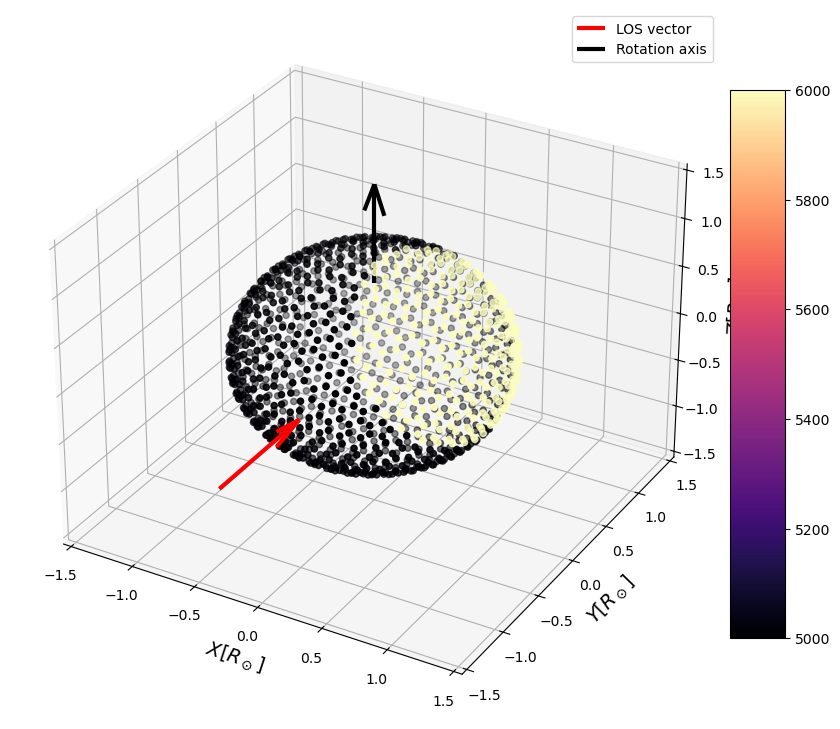

In [14]:
plot_3D(s, 0, cmap='magma');

In [15]:
wvs = jnp.linspace(jnp.log10(4000), jnp.log10(5500), 100)
k_si = simulate_spectrum(flux, m, wvs)

In [16]:
k_si_spot = simulate_spectrum(flux, s, wvs)

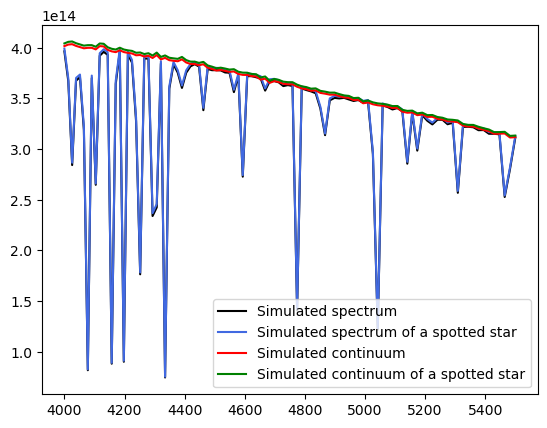

In [18]:
plt.plot(10**wvs, k_si[:, 0], color='black', label='Simulated spectrum')
plt.plot(10**wvs, k_si_spot[:, 0], color='royalblue', label='Simulated spectrum of a spotted star')
plt.plot(10**wvs, k_si[:, 1], color='red', label='Simulated continuum')
plt.plot(10**wvs, k_si_spot[:, 1], color='green', label='Simulated continuum of a spotted star')
plt.legend()